# Videogame Recommendation System on Steam Data

-- DISCLAIMER, data is from https://www.kaggle.com/datasets/tamber/steam-video-games/data, I don't work actually work at Steam.

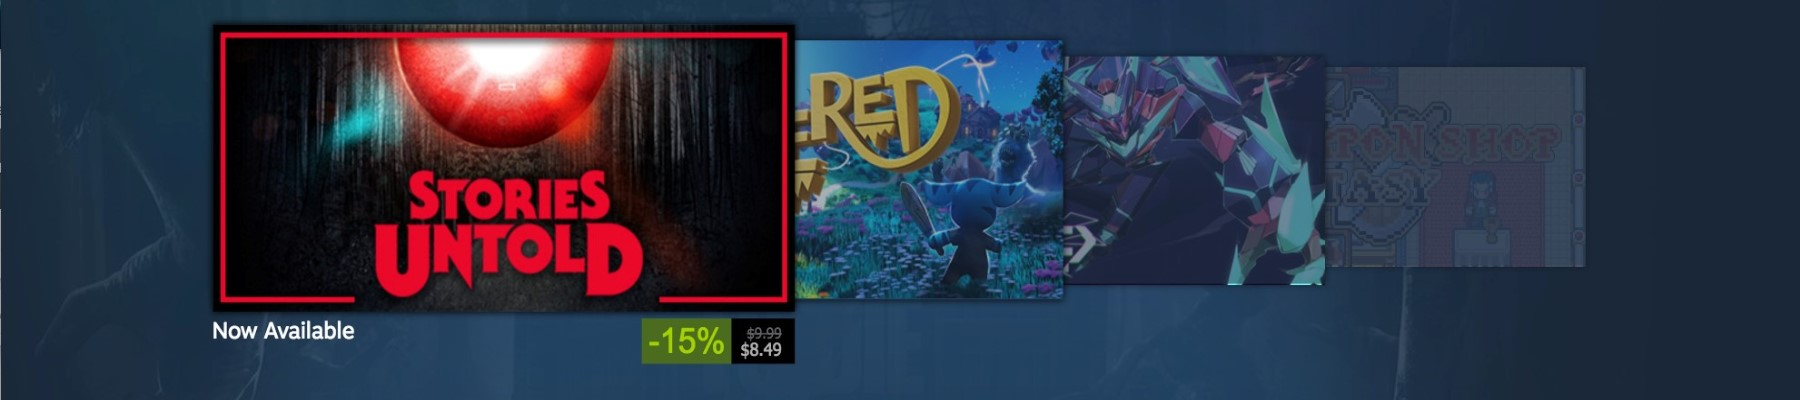

The feedback on Steam's recommendation system from gamers who play a lot of games are confused or interested in some of the recommendations garnered by Steam using their data. The task given to me is to create a better-suited recommendation system for all the millions of Steam users due to how the current rec sys is lacking behind a little in these times. 

## Reading in the dataset and performing EDAs

In [ ]:
# Importing pands to read in the dataset and analyze it
import pandas as pd

# Steam Videogames
SteamVGs = pd.read_csv('data\steam-200k.csv')

## Now looking at the dataset with exactly 200k rows, we can see the following columns -
- User ID
- Game Name
- Purchase/Play 
- 1.0 if behavior is purchase, number of hours played if behavior is play
- A random column filled with 200k 0s

In [ ]:
SteamVGs

In [ ]:
SteamVGs.info()

## This dataset is really, really clean, but it definitely has some problems with it. The first things I want to clean up before I work on this dataset is to -
- Give dataset proper column titles
- Drop that column with 200k 0s

In [ ]:
# Since the dataset has no titls, creating a list of titles
columns = ['User_ID', 'Videogame', 'Behavior', 'Hours_Played', 'Drop_this']

# Reading the data in, but removing the assumed title, and assigning names to the list
SteamVGs = pd.read_csv('data\steam-200k.csv', header=None, names=columns)

# Dropping that last useless column
SteamVGs.drop("Drop_this", axis=1, inplace=True)

SteamVGs

## Visualizing the data to try and understand the data a little bit more. Ideas:
- Unique users count, users that appear the most, users that appear the least
- Users by play time, top 25, and bottom 25
- Videogames, sorted by count, top 25 vg counts, bottom vg counts
- Videogames by play time, top 25 vgs by play time, bottom vgs play times
- How many people did not by the game they played

### User counts visuals section:

In [ ]:
# Importing relevant packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Printing the number of unique users
print("There are", len(SteamVGs['User_ID'].unique()), "users in the dataset.")

In [ ]:
# Top 25 users that appear the most
SteamVGs['User_ID'].value_counts(ascending=True).sort_values().tail(25).plot(kind='barh')
print(SteamVGs['User_ID'].value_counts().head(25))

In [ ]:
# Top 25 users that bought the most games
SteamVGs[SteamVGs["Behavior"]=="purchase"]["User_ID"].value_counts(ascending=True).sort_values().tail(25).plot(kind="barh")
print(SteamVGs[SteamVGs["Behavior"]=="purchase"]["User_ID"].value_counts().head(25))

In [ ]:
# Users that appear the least
print("There are", len(SteamVGs['User_ID'].drop_duplicates(keep=False)), "users that only appear once in the dataset.")

### User counts by play time section:

In [ ]:
# Top 25 Users by playtime

print(SteamVGs[SteamVGs["Behavior"]=="play"].groupby("User_ID")["Hours_Played"].sum().sort_values(ascending=False).head(25))

SteamVGs[SteamVGs['Behavior']=='play'].groupby("User_ID")["Hours_Played"].sum().sort_values().tail(25).plot(kind='barh')

In [ ]:
# Bottom 25
SteamVGs[SteamVGs['Behavior']=='play'].groupby("User_ID")["Hours_Played"].sum().sort_values(ascending=False).tail(25)

In [ ]:
print("There are", len(SteamVGs[SteamVGs["Hours_Played"]==0.1]), "instanes of people playing a game 6 minutes or less")

### All videogames


In [ ]:
# Count of videogames
len(SteamVGs.groupby("Videogame"))

In [ ]:
# Making a list of every single videogame to see some of the competition
videogames = list(SteamVGs["Videogame"].unique())

videogames

### Videogame counts section:

In [ ]:
# Top 25 most popular videogames

print(SteamVGs["Videogame"].value_counts().head(25))

SteamVGs["Videogame"].value_counts().head(25).sort_values().plot(kind="barh")

In [ ]:
# How many videogames appear only once
print("There are", len(SteamVGs["Videogame"].drop_duplicates(keep=False)), "games that appear once.")

### Videogame by play time section:

In [ ]:
# Top 25 most played videogames

print(SteamVGs[SteamVGs['Behavior']=='play'].groupby("Videogame")["Hours_Played"].sum().sort_values(ascending=False).head(25))

SteamVGs[SteamVGs['Behavior']=='play'].groupby("Videogame")["Hours_Played"].sum().sort_values().tail(25).plot(kind="barh")

In [ ]:
# Least 25 most plays videogames
print("There are",
      len(SteamVGs[SteamVGs['Hours_Played']==0.1].groupby("Videogame")), "games that are played for 6 minutes or less.")

### Just checking to see if there are any users that have purchase as 0

In [ ]:
# Checking how many purchases there were across all users
print("There are", len(SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 1)]),
     "videogame purchases across all users.")

SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 1)]

In [ ]:
# Checking if any users haven't purchased their game
print("There are", len(SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 0)]),
     "people who haven't bought the game they've played.")

SteamVGs.loc[(SteamVGs['Behavior']=="purchase") & (SteamVGs["Hours_Played"] == 0)]

In [ ]:
# Here, I accidentally found that there are some people who bought games and NEVER played them. 
# Now, I am trying to find just how many instance there are of this. 
# So these are technically the REAL bottom 25. 

# As you can see by this tail, there are some users who just have a "purchase" and no play.
SteamVGs.groupby("User_ID")["Hours_Played"].sum().sort_values(ascending=False).tail(10)

In [ ]:
# Instances of people purchasing games
purchases_count = len(SteamVGs[SteamVGs['Behavior']=='purchase'])
print("Purchase count: ", purchases_count)

# Instances of people playing games
play_count = len(SteamVGs[SteamVGs['Behavior']=='play'])
print("Play count: ", play_count)

# Instances of people buying a game and not playing them
print("There are", purchases_count - play_count, "instances of people purchasing a game and never playing them.")

### Recommendation Systems I can make off of this data:
- Popularity-based recommendations
- Playtime-based recommendations
- User-based collaborative filtering using play time

### Limitations to think about for future recommendation systems
- In the playtime area, it would be great to have data on the playtime in the first 14 days of the purchase and playtime in the last 14 days in real-time
- Improved u-b collab filtering by categorizing games by the length of the game. (short games, long games, and replayable/open-ended games)
- Maybe also categorize games by developer status like Triple A, Indie, and everything in between to improve performance

In [ ]:
# Firstly, do I drop every row where the Behavior column is purchase?
# Or at least filter for just the play role in each section?

# Oh NO, I SHOULD use purchase so it doesn't recommend games a user has already bought, but
# use the playtime for similarities

In [ ]:
# Creating a new datarframe that only holds rows with play time values for better recommendations
Playtimes = SteamVGs[SteamVGs["Behavior"]=="play"].pivot_table(index="Videogame", columns="User_ID", values="Hours_Played")

# Filling in the games that have NaN as playtimes because the user has no data on play time for that game yet
Playtimes = Playtimes.fillna(0)

In [ ]:
# The dataset is now formatted to be each videogame play time per user
Playtimes

In [ ]:
#importing csr_matrix to convert playtime dataframe
from scipy.sparse import csr_matrix

# Creating matrix using the values in the dataset
pt_matrix = csr_matrix(Playtimes.values)
pt_matrix.shape

In [ ]:
# Importing a random select feature to pick one of the users in the matrix at random
import numpy as np

# Random value chosen from 1 to the x amount of users
user_index = np.random.choice(pt_matrix.shape[0])

In [ ]:
# Importing a distance metric to find the most similar points using cosine similarity
from sklearn.metrics.pairwise import linear_kernel

cosine = linear_kernel(pt_matrix)

In [ ]:
# Function to compute the similarity in the data by looking at what they and other users have played
# Creates an empty list to be used to find the 10 most similar games, and returns that list back
def recommendations(name, cosine = cosine):
    videogame_list = []
    
    score = pd.Series(cosine[user_index]).sort_values(ascending=False)
    
    top_10 = list(score.iloc[0:11].index)
    
    for each in top_10:
        videogame_list.append(list(Playtimes.index)[each])
        
    return videogame_list

In [ ]:
# Shows the index of the 10 recommended games from the list as the titles of the 10 recommended games
recommendations(Playtimes.index[user_index])

In [ ]:
# This is the original data on games the random user has played
SteamVGs[SteamVGs["User_ID"]==Playtimes.columns[user_index]]
# Program never recommends the same game as you can see